# Car Pricing:

## initializing dataset

In [35]:
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [106]:
df = pd.read_csv("/Users/Bilal/PycharmProjects/LearningAI/Files/assignment_6/task_2/train.csv")

In [107]:

df.drop(columns=["Doors"], inplace=True)

In [108]:
# Remove Price column
price_col = df.pop("Price")
df.insert(16, "Price", price_col)



In [109]:
df = df.loc[(df["Price"] < 600000) & (df["Price"] > 500)]

In [78]:
df

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price
0,45654403,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13328
1,44731507,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,16621
2,45774419,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,8467
3,45769185,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,3607
4,45809263,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,11726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,Left wheel,Grey,12,5802
19232,45798355,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,8467
19233,45778856,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,15681
19234,45804997,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,26108


In [79]:
df['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [80]:
df['Levy'] = df['Levy'].astype('string').apply(lambda x: 0 if x == '-' else x).astype(int)
df["Manufacturer"] = df['Manufacturer'].astype('string')
df["Model"] = df['Model'].astype('string')
df["Category"] = df['Category'].astype('string')
df["Leather interior"] = df['Leather interior'].astype('string')
df["Fuel type"] = df['Fuel type'].astype('string')
df["Engine volume"] = df['Engine volume'].astype('string').str.split(" ").str[0].astype('float')
df["Mileage"] = df['Mileage'].astype('string').str.split(" ").str[0].astype('int')
df["Gear box type"] = df['Gear box type'].astype('string')
df["Drive wheels"] = df['Drive wheels'].astype('string')
df["Wheel"] = df['Wheel'].astype('string')
df["Color"] = df['Color'].astype('string')



In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17569 entries, 0 to 19235
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17569 non-null  int64  
 1   Levy              17569 non-null  int64  
 2   Manufacturer      17569 non-null  string 
 3   Model             17569 non-null  string 
 4   Prod. year        17569 non-null  int64  
 5   Category          17569 non-null  string 
 6   Leather interior  17569 non-null  string 
 7   Fuel type         17569 non-null  string 
 8   Engine volume     17569 non-null  float64
 9   Mileage           17569 non-null  int64  
 10  Cylinders         17569 non-null  float64
 11  Gear box type     17569 non-null  string 
 12  Drive wheels      17569 non-null  string 
 13  Wheel             17569 non-null  string 
 14  Color             17569 non-null  string 
 15  Airbags           17569 non-null  int64  
 16  Price             17569 non-null  int64  
dty

## Encoding Textual data

In [82]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
label_encoder = LabelEncoder()



In [83]:
df["Manufacturer"] = label_encoder.fit_transform(df["Manufacturer"])

In [84]:
df["Model"] = label_encoder.fit_transform(df["Model"])

In [85]:
df["Category"] = label_encoder.fit_transform(df["Category"])


In [86]:
df["Fuel type"] = label_encoder.fit_transform(df["Fuel type"])


In [87]:
xx = ohe.fit_transform(df[["Gear box type"]])

df = pd.concat([df, xx], axis=1).drop(columns=["Gear box type"])



In [88]:
xx = ohe.fit_transform(df[["Drive wheels"]])

df = pd.concat([df, xx], axis=1).drop(columns=["Drive wheels"])


In [89]:
xx = ohe.fit_transform(df[["Color"]])

df = pd.concat([df, xx], axis=1).drop(columns=["Color"])


In [90]:
df["Leather interior"] = label_encoder.fit_transform(df["Leather interior"])

In [91]:
df["Wheel"] = label_encoder.fit_transform(df["Wheel"])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17569 entries, 0 to 19235
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       17569 non-null  int64  
 1   Levy                     17569 non-null  int64  
 2   Manufacturer             17569 non-null  int64  
 3   Model                    17569 non-null  int64  
 4   Prod. year               17569 non-null  int64  
 5   Category                 17569 non-null  int64  
 6   Leather interior         17569 non-null  int64  
 7   Fuel type                17569 non-null  int64  
 8   Engine volume            17569 non-null  float64
 9   Mileage                  17569 non-null  int64  
 10  Cylinders                17569 non-null  float64
 11  Wheel                    17569 non-null  int64  
 12  Airbags                  17569 non-null  int64  
 13  Price                    17569 non-null  int64  
 14  Gear box type_Automatic  17

## Splitting into train and test

In [93]:
price_col = df.pop("Price")
df.insert(36, "Price", price_col)

In [110]:
X = df.iloc[:, 1:36]
X

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,Left wheel,Grey,12
19232,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5
19233,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8
19234,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4


In [112]:
y = df.iloc[:, 36]
y

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19231     5802
19232     8467
19233    15681
19234    26108
19235     5331
Name: Price, Length: 17569, dtype: int64

## splitting the data into train and test sets


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Scale the training and test features

In [349]:
minmax = MinMaxScaler(feature_range=(0, 1))
x2 = minmax.fit_transform(X_train[["bmi", "children"]])
X_train[["bmi", "children"]] = x2

In [350]:
x3 = minmax.transform(X_test[["bmi", "children"]])
X_test[["bmi", "children"]] = x3

# Regression

## Training the Model

In [351]:
'''
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

print(y_test_log)
'''

'\ny_train_log = np.log1p(y_train)\ny_test_log = np.log1p(y_test)\n\nprint(y_test_log)\n'

In [98]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer='adam',
    metrics=['mae']
)

model.fit(X_train, y_train, epochs=100)

y_pred = model.predict(X_test).ravel()

Epoch 1/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - loss: 107878.9375 - mae: 107878.9375
Epoch 2/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 228987.8594 - mae: 228987.8594
Epoch 3/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 162259.0469 - mae: 162259.0469
Epoch 4/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 131455.8750 - mae: 131455.8750
Epoch 5/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 47495.0625 - mae: 47495.0625
Epoch 6/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 26506.4434 - mae: 26506.4434
Epoch 7/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 37479.4336 - mae: 37479.4336
Epoch 8/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 25162.0020 - mae: 25162.0020
Epoch 9/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 16619.0254 - mae: 16619.0254
Epoch 10/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 23915.2891 - mae: 23915.2891
Epoch 11/100
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 18170.5

In [99]:
lr = LinearRegression()
lr.fit(X_train, y_train)
library_pred = lr.predict(X_test).ravel()

In [100]:
print("for scikitlearn Library = ", r2_score(y_test, library_pred))
print(r2_score(y_test, y_pred))

for scikitlearn Library =  0.2714530395180682
0.06593447923660278


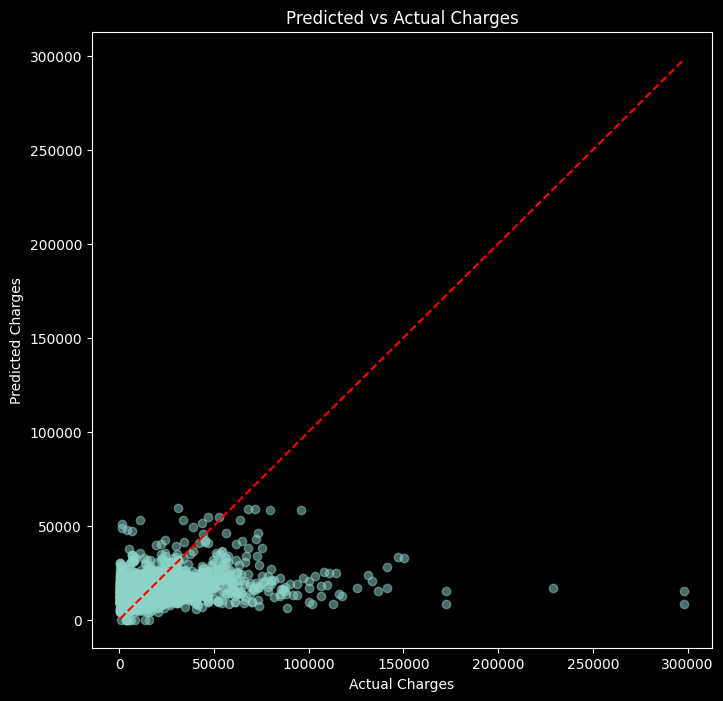

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()


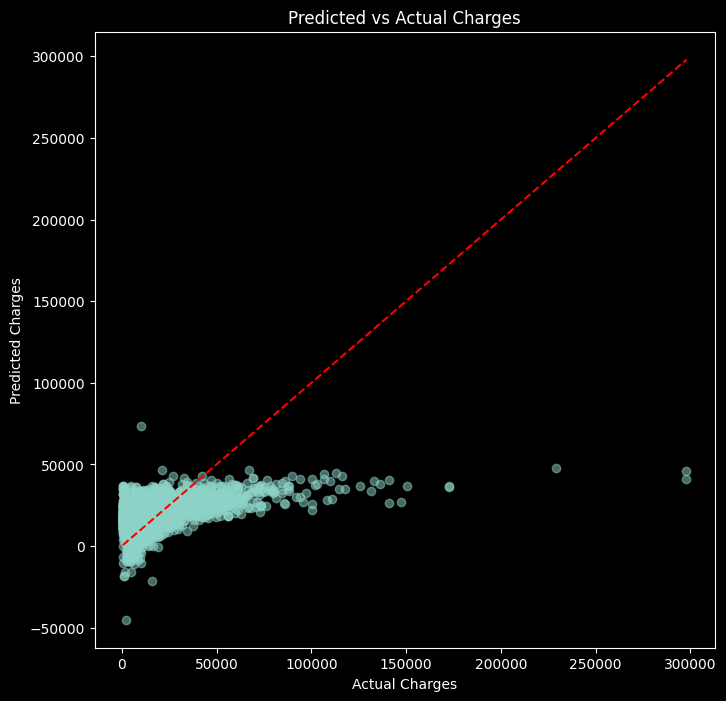

In [102]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, library_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()

In [404]:
X_train

,sex,bmi,children,smoker,region
714,0,22.600,0,0,3
441,0,33.500,0,1,3
963,1,24.795,3,0,0
78,0,39.805,0,0,0
560,0,19.950,2,0,1
...,...,...,...,...,...
421,1,35.860,0,1,2
97,1,38.280,0,0,2
468,0,24.320,1,0,0
37,1,20.800,0,0,3


# Decision Tree

In [116]:
import xgboost as xgb

# DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train regression model
model_xgboost = xgb.train(
    params={"objective": "reg:squarederror", "eval_metric": "mae"},
    dtrain=dtrain,
    num_boost_round=50,
    evals=[(dtrain, "train"), (dtest, "test")],
    enable_categorical=True
)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Levy: object, Manufacturer: object, Model: object, Category: object, Leather interior: object, Fuel type: object, Engine volume: object, Mileage: object, Gear box type: object, Drive wheels: object, Wheel: object, Color: object

In [104]:
y_pred_xg = model_xgboost.predict(dtest)
print(r2_score(y_test, y_pred_xg))

0.7495136260986328


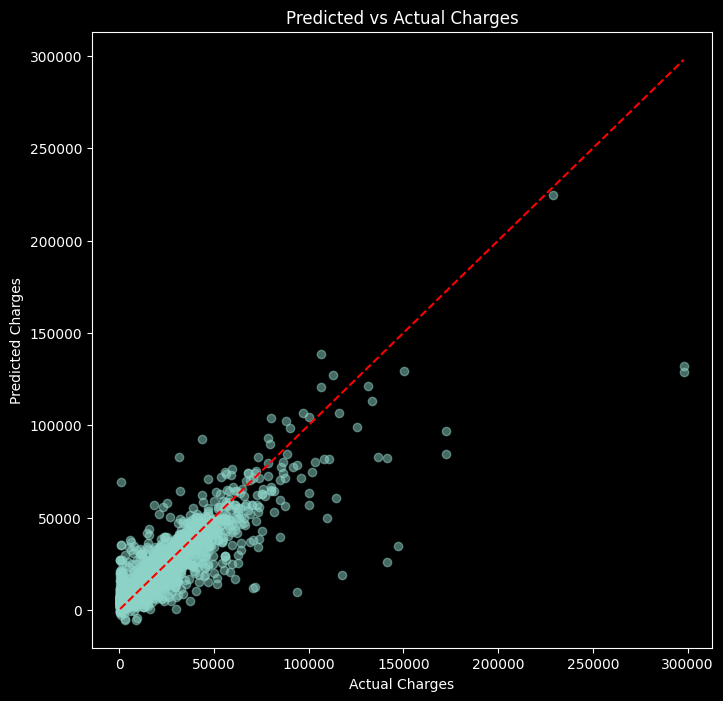

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_xg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.show()